### <div style = text-align:center><font color="royalblue">📝week1</font> HW📝</div>

#### <div style = text-align:right>김세정</div>

### p1. ISL 3.5

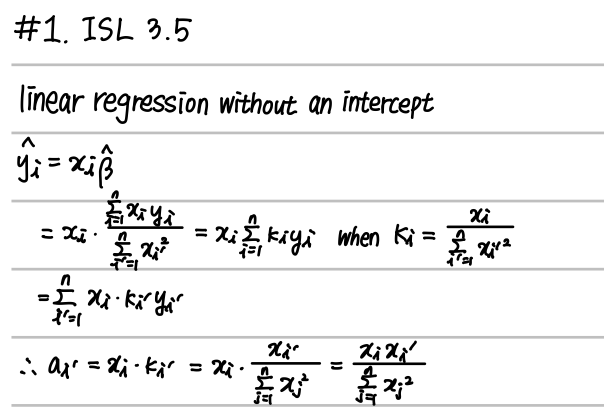

### p2. ESL 3.4

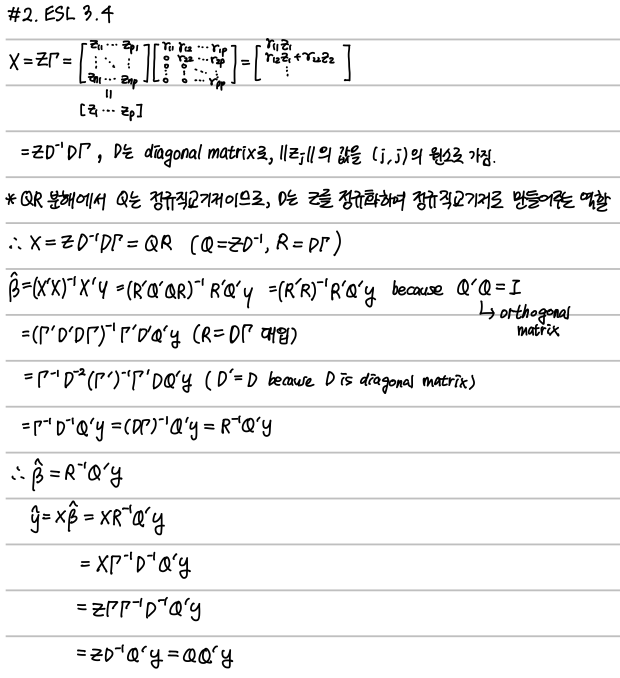

### p3. 직접 코딩

In [1]:
# Data Import
import ssl
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context #Github에서 데이터를 바로 불러오도록 하는 세팅입니다. 해당 코드 무시하고 데이터 받아서 쓰셔도 됩니다!
data = pd.read_csv('https://github.com/YonseiESC/ESC-21SUMMER/blob/main/week1/HW/week1_data.csv?raw=True')
y = data['mpg']
x = data.drop(['mpg'],axis=1)

In [2]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
dtype: int64

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     397 non-null    int64  
 1   displacement  397 non-null    float64
 2   horsepower    397 non-null    object 
 3   weight        397 non-null    int64  
 4   acceleration  397 non-null    float64
 5   year          397 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 17.1+ KB


In [20]:
x.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

horsepower만 dtype이 object라 unique() 함수를 통해 값을 확인해보니 ?가 존재하는 것을 확인할 수 있었음.  
?를 제외하고 추정치들을 구하도록 하겠음 !

In [21]:
idx = x[x['horsepower']=='?'].index
x = x.drop(idx)
x.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

물음표가 없어진 것을 확인할 수 있었다 ! 이제 dtype을 수치형으로 바꿔주도록 하겠다 !

In [23]:
x['horsepower'] = pd.to_numeric(x['horsepower'])
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   year          392 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 21.4 KB


변환 완료 !

In [25]:
y = y.drop(idx)

행렬 계산을 위해 y도 크기를 맞춰줘야 하기 때문에 아까 구한 idx행을 빼준다 !

In [26]:
import numpy as np
def YourOwnRegression(x,y):
    # beta와 y의 추정값을 반환하는 함수를 만들어주세요.
    beta = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)),x.T),y)
    yhat = np.dot(x,beta)
    return beta, yhat
# 결과물 반환
YourOwnRegression(x,y)

(array([-0.5226089 ,  0.01022108, -0.020873  , -0.00639456, -0.05202195,
         0.61025869]),
 array([15.93081361, 14.45720405, 16.11263762, 15.93670419, 16.10071197,
        10.51021782, 10.27543153, 10.53128391,  9.67525181, 13.49634208,
        15.59946068, 15.17857818, 14.95056695, 18.23756934, 23.85149163,
        20.70116218, 21.04691637, 22.47738545, 25.4075601 , 27.85849004,
        21.93938914, 23.54965655, 23.61026333, 24.5700506 , 22.02475307,
         7.48992449,  8.73758029,  8.68094775,  6.39448743, 26.01781879,
        25.50668622, 25.43458909, 22.95714525, 17.50355598, 18.56684981,
        18.98997897, 18.64504732, 11.74185816, 10.43958016, 12.2762232 ,
        12.39844199,  7.02172716,  8.71466792,  6.09084578, 20.89073634,
        24.7795066 , 18.89340516, 20.0843144 , 25.76559234, 26.24104628,
        26.30753902, 26.59195154, 28.28090927, 29.28279009, 28.2609542 ,
        27.13912286, 25.6470868 , 26.69569542, 26.07663641, 24.9880403 ,
        26.2074288 , 11.9364